<a href="https://colab.research.google.com/github/chiaralattanzi/Coursera_Capstone/blob/master/UnsupervisedClassificarionECB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning ECB


# Data Loading

In [4]:



# 1) We extract the data from a Reuters Euro news plus
import math
import tqdm
import pandas as pd
data = pd.read_csv('/content/Reuters_Euro_news_plus.csv', error_bad_lines=False);

print(data.head())

data_text = data[['body']]
data_text['id'] = data_text.index
documents = data_text

print("The doc length is: ",len(documents))
print(documents[:5])

   Unnamed: 0  ...                                              words
0           0  ...  lyon france britain pay price decide proceed p...
1           1  ...  luxembourg european union finance minister agr...
2           2  ...  brussels athens plan cut bad loan greek bank b...
3           3  ...  nuremberg germany chancellor angela merkel sai...
4           4  ...  frankfurt european central bank policymakers d...

[5 rows x 5 columns]
The doc length is:  13000
                                                body  id
0  LYON, France (Reuters) - Britain will have to ...   0
1  LUXEMBOURG (Reuters) - European Union finance ...   1
2  BRUSSELS/ATHENS (Reuters) - Plans to cut bad l...   2
3  NUREMBERG, Germany (Reuters) - Chancellor Ange...   3
4  FRANKFURT (Reuters) - European Central Bank po...   4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Data preprocessing

In [5]:
# 2) Data preprocessing

# 2.1) Tokenization: split the text into sentences and the sentences into words

# 2.2) Words with less than 3 letters are removed

# 2.3) All stopwords are removed

# 2.4) Words are lemmatized: words in third person are changed to first person and verbs in past and future in present

# 2.5) Words are stemmed: are reduced to their root form

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

# we write a function for lemmatization and stemming (2.4) + 2.5))
stemmer = SnowballStemmer('english')
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# we make a trial with one document to see the effect of lemmatization and stemming 
doc_sample = documents[documents['id'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

# Now we can save the preprocessed articles in the variable 'processed_docs'
processed_docs = documents['body'].map(preprocess)

print (processed_docs[:10])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
original document: 
['BERLIN', '(Reuters)', '-', 'German', 'Health', 'Minister', 'Jens', 'Spahn,', 'campaigning', 'to', 'succeed', 'Chancellor', 'Angela', 'Merkel', 'as', 'leader', 'of', 'the', 'Christian', 'Democrats', '(CDU),', 'pledged', 'in', 'a', 'newspaper', 'article', 'to', 'tighten', 'immigration', 'and', 'forge', 'a', 'distinctive', 'right-wing', 'identity', 'for', 'the', 'party.', 'Spahn,', 'seen', 'as', 'the', 'furthest-right', 'of', 'the', 'three', 'candidates', 'to', 'succeed', 'Merkel,', 'nonetheless', 'rejected', 'the', 'divisive', '“demagoguery”', 'of', 'the', 'far-right', 'and', 'the', '“seemingly', 'modern', 'populism', 'of', 'the', 'Greens”,', 'arguing', 'that', 'the', 'CDU', 'was', 'losing', 'to', 'both', 'parties', 'simply', 'because', 'it', 'had', 'become', 'too', 'amorphous.', '“We', 'are', 'losing', 'to', 'both', 'sides', 'mainly', 'because', 'our',

In [6]:
bigram = gensim.models.Phrases(processed_docs, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[processed_docs], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[processed_docs[0]]])

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

processed_docs = make_bigrams(processed_docs)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['lyon', 'franc', 'reuter', 'britain', 'price', 'decid', 'proceed', 'posit', 'brexit', 'unaccept', 'european', 'union', 'countri', 'french', 'presid', 'emmanuel_macron', 'say', 'thursday', 'want', 'compat', 'accept', 'fine', 'say', 'macron', 'speak', 'english', 'event', 'lyon', 'want', 'accept', 'respons', 'british', 'prime', 'minist', 'bori_johnson', 'irish', 'counterpart', 'northern', 'england', 'thursday', 'ditch', 'attempt', 'reviv', 'british', 'propos', 'brexit', 'deal', 'say', 'fall', 'short', 'need', 'order', 'departur']


# Feature engineering: dictionaries and TFIDF

In [7]:
# 3) Now, starting from processed_docs, we create a dictionary in which it is written how many times a word appears in the training set.

dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
# 3.1) Now, with the function 'filter_extremes' we can filter the tokens that appear in less than 15 documents(absolute value, out of 1 million documents in our dataset), or in more than 50% of the documents.
#Then after this step we keep only the first 100 000 most frequent tokens.
min_number = math.floor(len(documents)*15./1e6)
print ("min_number: ", min_number)
#keep_n=100000
dictionary.filter_extremes(no_below=4, no_above=0.5)


0 accept
1 attempt
2 bori_johnson
3 brexit
4 britain
5 british
6 compat
7 counterpart
8 countri
9 deal
10 decid
min_number:  0


In [8]:

# 4) Now for each preprocessed document we create a dictionary. This dictionary contains 2D vectors related to the words in the prepocessed doc. Each vector has one index that identifies the word and the other that tells us how many times this word appear in the given document.
# We save the results in bow_corpus.

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[4310]) #In this way we select the doc 4310 

#We see explicitly the words of doc 4310 that are listed here

bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0],

dictionary[bow_doc_4310[i][0]],
bow_doc_4310[i][1]))


[(8, 1), (24, 1), (28, 1), (50, 1), (71, 1), (89, 1), (112, 1), (137, 1), (158, 3), (162, 1), (169, 1), (173, 3), (248, 1), (309, 1), (313, 2), (511, 1), (514, 2), (535, 1), (587, 1), (611, 1), (613, 2), (624, 1), (714, 2), (761, 1), (767, 1), (787, 1), (850, 1), (873, 1), (896, 1), (1193, 1), (1232, 1), (1273, 1), (1277, 1), (1369, 1), (1572, 1), (1650, 1), (1719, 1), (1764, 1), (1772, 2), (1838, 1), (1946, 1), (1969, 1), (2090, 1), (2280, 1), (2602, 1), (2941, 2), (3178, 1), (3264, 2), (3953, 1), (4085, 1), (4210, 1), (4341, 1), (4578, 1), (4597, 1), (5004, 1), (5694, 1), (7711, 1), (9179, 1), (10066, 1), (13267, 1), (17304, 1), (19067, 1), (20015, 1), (20019, 1)]
Word 8 ("countri") appears 1 time.
Word 24 ("minist") appears 1 time.
Word 28 ("posit") appears 1 time.
Word 50 ("argu") appears 1 time.
Word 71 ("clear") appears 1 time.
Word 89 ("divis") appears 1 time.
Word 112 ("german") appears 1 time.
Word 137 ("main") appears 1 time.
Word 158 ("parti") appears 3 time.
Word 162 ("popu

In [9]:
# 5) We pass from the term frequency(tf) representation to the TFIDF representation. 
#We apply the transformation to the bow_corpus (so the set in which there are the word frequency) and we save it to corpus_tfidf.
#To do this we first need to create an object tf-idf using 'models.TfidfModel' on bow_corpus.
#Then we apply this object to the entire corpus and we call the resuting corpu corpus_tfidf.
#Finally we preview the tfidf scores for our first doc
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.25975167517510844),
 (1, 0.13161431573106006),
 (2, 0.1385035362360011),
 (3, 0.147189597993886),
 (4, 0.06624296804205335),
 (5, 0.16792164551420669),
 (6, 0.2715777795634606),
 (7, 0.1602912273727711),
 (8, 0.046349532090072865),
 (9, 0.06187901046640551),
 (10, 0.10804768552330397),
 (11, 0.14107934278849735),
 (12, 0.1968165548979995),
 (13, 0.11331542552492727),
 (14, 0.13842994392256708),
 (15, 0.2018710085304353),
 (16, 0.12585581405690258),
 (17, 0.0863045982861672),
 (18, 0.19816511805929604),
 (19, 0.07940636956575632),
 (20, 0.08420544075895597),
 (21, 0.12596746827428645),
 (22, 0.501826187191184),
 (23, 0.1265865189368217),
 (24, 0.038239068444908694),
 (25, 0.06498407192566209),
 (26, 0.14123550529136372),
 (27, 0.09609023321291629),
 (28, 0.08232717295311835),
 (29, 0.046069285786735276),
 (30, 0.0825846424442051),
 (31, 0.05937106917913389),
 (32, 0.16625747431605392),
 (33, 0.0967319328098211),
 (34, 0.10854019736124507),
 (35, 0.16992880010910966),
 (36, 0.1027

# LDA baseline

In [10]:
#6) Running LDA
#6.1) We train out LDA model using 'gensim.models.LdaMulticore'
work_num=2

lda_model = models.LdaMulticore(corpus=bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers = work_num)
 
#passes (optional) : number of passess through the entire corpus during training
#workers(optional) : set workers diretly to the number of your real cores

#6.2) For each topic we will explore the number of words occurring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

print("This was tf:can you distinguish different topics using the words in each topic and their corresponding weights?")

# 6.3) Now we run the LDA using TF-IDF
lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=work_num)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
print("This was tfidf:can you distinguish different topics using the words in each topic and their corresponding weights?")

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 
Words: 0.016*"market" + 0.012*"percent" + 0.008*"week" + 0.008*"bank" + 0.008*"euro" + 0.007*"expect" + 0.007*"month" + 0.007*"bond" + 0.006*"rise" + 0.006*"brexit"
Topic: 1 
Words: 0.009*"compani" + 0.006*"euro" + 0.005*"million" + 0.005*"percent" + 0.005*"countri" + 0.005*"financi" + 0.005*"billion" + 0.005*"state" + 0.004*"govern" + 0.004*"firm"
Topic: 2 
Words: 0.020*"percent" + 0.019*"dollar" + 0.014*"euro" + 0.010*"currenc" + 0.008*"week" + 0.007*"market" + 0.007*"greec" + 0.007*"trade" + 0.006*"trump" + 0.006*"polici"
Topic: 3 
Words: 0.016*"parti" + 0.011*"minist" + 0.011*"elect" + 0.010*"govern" + 0.008*"vote" + 0.007*"prime" + 0.006*"leader" + 0.006*"percent" + 0.006*"leav" + 0.005*"right"
Topic: 4 
Words: 0.011*"percent" + 0.009*"govern" + 0.008*"germani" + 0.007*"china" + 0.007*"german" + 0.007*"trade" + 0.006*"merkel" + 0.006*"state" + 0.006*"economi" + 0.005*"month"
Topic: 5 
Words: 0.010*"deal" + 0.009*"govern" + 0.008*"percent" + 0.006*"week" + 0.006*"state" +

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 Word: 0.006*"greec" + 0.004*"bailout" + 0.004*"merkel" + 0.003*"euro" + 0.003*"financ" + 0.003*"zone" + 0.003*"bank" + 0.003*"minist" + 0.003*"greek" + 0.003*"britain"
Topic: 1 Word: 0.003*"percent" + 0.002*"inse" + 0.002*"consum" + 0.001*"berlusconi" + 0.001*"davo" + 0.001*"price" + 0.001*"greec" + 0.001*"french" + 0.001*"rate" + 0.001*"month"
Topic: 2 Word: 0.006*"percent" + 0.004*"bank" + 0.003*"growth" + 0.003*"euro" + 0.003*"rise" + 0.003*"market" + 0.003*"trade" + 0.003*"dollar" + 0.003*"quarter" + 0.003*"economi"
Topic: 3 Word: 0.007*"iran" + 0.004*"iranian" + 0.003*"attack" + 0.003*"nuclear" + 0.003*"sanction" + 0.002*"unit" + 0.002*"tehran" + 0.002*"boe" + 0.002*"state" + 0.002*"washington"
Topic: 4 Word: 0.005*"fillon" + 0.004*"parti" + 0.003*"vote" + 0.003*"elect" + 0.002*"candid" + 0.002*"spain" + 0.002*"macron" + 0.002*"minist" + 0.002*"socialist" + 0.002*"right"
Topic: 5 Word: 0.004*"mont_paschi" + 0.003*"davo_switzerland" + 0.003*"forum_davo" + 0.003*"siena_bmps

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [12]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs,dictionary=dictionary, coherence='c_v')
coherence_lda_bow = coherence_model_lda.get_coherence()
print('Coherence Score bow: ', coherence_lda_bow)
# Compute Coherence Score Mallet
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs,dictionary=dictionary, coherence='c_v')
coherence_lda_tfidf = coherence_model_lda.get_coherence()
print('Coherence Score tfidf: ', coherence_lda_tfidf)

Coherence Score bow:  0.428797928237077
Coherence Score tfidf:  0.48876595624950026


In [15]:
# visualize with bow corpus
from gensim import corpora, models, similarities
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

KeyboardInterrupt: ignored

# LDA Mallet implementation

In [17]:
#!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from gensim import similarities
import os.path
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 
ldamallet10 = LdaMallet(mallet_path, corpus=bow_corpus, num_topics=10, id2word=dictionary)
# Show Topics
pprint(ldamallet10.show_topics(formatted=False))

# Compute Coherence Score without Mallet
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs,dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
# Compute Coherence Score Mallet
coherence_model_lda_mallet = CoherenceModel(model=ldamallet10, texts=processed_docs,dictionary=dictionary, coherence='c_v')
coherence_lda_mallet = coherence_model_lda_mallet.get_coherence()
print('Coherence Score: ', coherence_lda_mallet)

#coherence_model_ldamallet10 = CoherenceModel(model=ldamallet10, texts=bow_corpus, dictionary=dictionary, coherence='c_v')
#coherence_ldamallet10 = coherence_model_ldamallet10.get_coherence()
#print('\nCoherence Score: ', coherence_ldamallet10)

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[(0,
  [('percent', 0.04460589724278134),
   ('market', 0.021490336427111234),
   ('dollar', 0.018868458754976187),
   ('month', 0.018780685312388513),
   ('rise', 0.017648124762870136),
   ('week', 0.016051214388049222),
   ('trade', 0.015414149078945134),
   ('expect', 0.01468931032725337),
   ('growth', 0.01184658334796224),
   ('currenc', 0.010640406362725167)]),
 (1,
  [('parti', 0.04386863738659705),
   ('elect', 0.035297035030342164),
   ('vote', 0.024507670929073733),
   ('leader', 0.020282694440155524),
   ('govern', 0.01753154695899948),
   ('parliament', 0.01714320471250977),
   ('polit', 0.01714320471250977),
   ('support', 0.014349947831131948),
   ('conserv', 0.013156848158181623),
   ('merkel', 0.011308713370670334)]),
 (2,
  [('brexit', 0.03826704933716004),
   ('britain', 0.03532109395168026),
   ('deal', 0.03497689297880633),
   ('union', 0.020636873035397022),
   ('london', 0.02033822807363876),
   ('british', 0.017782029672148574),
   ('leav', 0.013742730019892792),

# A first look at the topics: improve interpretability by removing noise

Here we should look at terms present in a variety of topics because too general

# A first visualization: first problems and solutions

In [18]:
#!pip install pyLDAvis
import pyLDAvis.gensim
# Visualize the topics
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(LDAvis_prepared)

KeyboardInterrupt: ignored

In [43]:
#Difference in visualization in tfidf
LDAvis_prepared_tfidf = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(LDAvis_prepared_tfidf)


KeyboardInterrupt: ignored

# Hyperparameter tuning and performance assessment (with Mallet Implementation and ... corpus)

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=bow_corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [20]:

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=processed_docs, start=4, limit=15, step=1)
# Show graph
limit=15; start=4; step=1;
x = range(start, limit, step)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


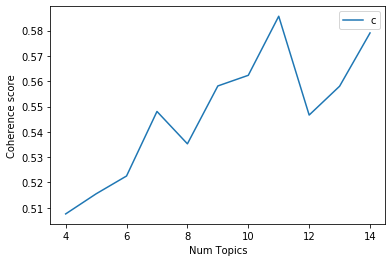

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [109]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

maximum = max(coherence_values)
opt = [i for i,j in enumerate(coherence_values) if j == maximum]



Num Topics = 4  has Coherence Value of 0.5076
Num Topics = 5  has Coherence Value of 0.5155
Num Topics = 6  has Coherence Value of 0.5226
Num Topics = 7  has Coherence Value of 0.5481
Num Topics = 8  has Coherence Value of 0.5353
Num Topics = 9  has Coherence Value of 0.5581
Num Topics = 10  has Coherence Value of 0.5623
Num Topics = 11  has Coherence Value of 0.5857
Num Topics = 12  has Coherence Value of 0.5466
Num Topics = 13  has Coherence Value of 0.558
Num Topics = 14  has Coherence Value of 0.5791


In [37]:
# Select the model and print the topics
optimal_model = model_list[opt]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.022*"compani" + 0.020*"state" + 0.018*"unit" + 0.011*"billion" + '
  '0.010*"china" + 0.010*"million" + 0.009*"trade" + 0.009*"iran" + '
  '0.008*"trump" + 0.008*"tariff"'),
 (1,
  '0.037*"parti" + 0.026*"elect" + 0.016*"vote" + 0.015*"leader" + '
  '0.011*"support" + 0.009*"spain" + 0.009*"polit" + 0.009*"parliament" + '
  '0.009*"open" + 0.007*"time"'),
 (2,
  '0.036*"market" + 0.021*"trade" + 0.019*"dollar" + 0.019*"week" + '
  '0.016*"percent" + 0.013*"stock" + 0.012*"month" + 0.012*"currenc" + '
  '0.011*"expect" + 0.009*"rise"'),
 (3,
  '0.044*"govern" + 0.035*"itali" + 0.024*"budget" + 0.019*"italian" + '
  '0.019*"commiss" + 0.019*"rule" + 0.018*"minist" + 0.016*"franc" + '
  '0.014*"rome" + 0.013*"financ"'),
 (4,
  '0.012*"presid" + 0.009*"trump" + 0.008*"state" + 0.008*"court" + '
  '0.007*"report" + 0.007*"investig" + 0.006*"case" + 0.006*"democrat" + '
  '0.005*"offic" + 0.005*"hous"'),
 (5,
  '0.041*"percent" + 0.032*"growth" + 0.032*"economi" + 0.024*"month" + '

# Training and visualization of the final optimal model

# Clustering with informative priors: a bayesian tale

In [70]:
word_vector= ['asset','authority','bank','board','business','central_bank','ceo','chief_executive','cost','cut','deal','declined',
'equity','euro','executive','finance','financial','fund','government','investigation','investment','investor','laundering','lender','loan','loss','management','market','merger',
'plan','possible','potential','regulator','sale','scandal','share','shareholder','state','supervisory','transaction','downgrade','profit_warning','acquisition','capital_increase','upgrade', 'debt','unsecured','credit',
'mortgage','commercial','downgrade','merger','outlook','upgrade','ebitda','profit','loss','debt','increase','decrease','worst','bad','good','report','investor',
'institution','startup','policy','insurance','insolvent','balance','trade','exposure','acquisition','stock','payment','option','derivative','share','arbitrage','growth','drift','swap','securities','call','put','cash','commodity','dividend']


bank


In [78]:
!pip install guidedlda
import guidedlda

seed_topic_list = word_vector
print(seed_topic_list[1])
model = guidedlda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
  print(t_id)
  print(st)
  for word in st:
      seed_topics[bow_corpus[word]] = t_id


model.fit(processed_docs, seed_topics=seed_topics_list, seed_confidence=0.15)

n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

authority
0
asset


TypeError: ignored

# Most representative topic for each article

In [81]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.6008,"bank, euro, percent, zone, britain, govern, un...","[lyon, franc, reuter, britain, price, decid, p..."
1,1,7.0,0.9199,"bank, euro, percent, zone, britain, govern, un...","[luxembourg, reuter, european, union, financ, ..."
2,2,7.0,0.9960,"bank, euro, percent, zone, britain, govern, un...","[brussel, athen, reuter, plan, loan, greek, ba..."
3,3,7.0,0.9667,"bank, euro, percent, zone, britain, govern, un...","[nuremberg, germani, reuter, chancellor_angela..."
4,4,7.0,0.4226,"bank, euro, percent, zone, britain, govern, un...","[frankfurt, reuter, european, central, bank, p..."
5,5,2.0,0.4723,"percent, dollar, euro, currenc, week, market, ...","[york, reuter, dollar, slide, week, low, thurs..."
6,6,5.0,0.9710,"deal, govern, percent, week, state, market, br...","[brussel, reuter, european, union, brexit, neg..."
7,7,3.0,0.9928,"parti, minist, elect, govern, vote, prime, lea...","[lisbon, reuter, portug, leav, parti, say, wed..."
8,8,9.0,0.8384,"peopl, state, polic, attack, tell, presid, gov...","[reuter, wale, midfield, aaron, ramsey, avail,..."
9,9,2.0,0.5885,"percent, dollar, euro, currenc, week, market, ...","[york, reuter, dollar, rise, week, high, safe_..."


# Most representative articles for each topic

In [0]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(2)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(10)



sent_topics_sorteddf_mallet.to_csv(path_or_buf='/content/sample_data/mallet.csv',index=False)

In [0]:

# 7) Performance evaluation for the tf model
#We do the performance evaluation on the document 4310
#We will get a score for each topic. This score corresponds to the probability thatour document's topic is that one (assigned from the LDA algorithm)

for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):

    print("\nScore for tf model: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

# 7.1) Performance evaluation for the tfidf model
#again we consider the document 4310

for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore for tfidf model: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))




Score for tf model: 0.47278332710266113	 
Topic: 0.006*"peopl" + 0.006*"state" + 0.005*"govern" + 0.005*"bank" + 0.005*"polic" + 0.004*"tell" + 0.004*"attack" + 0.004*"countri" + 0.004*"offici" + 0.003*"presid"

Score for tf model: 0.33589863777160645	 
Topic: 0.020*"bank" + 0.013*"euro" + 0.012*"percent" + 0.006*"market" + 0.006*"govern" + 0.006*"central" + 0.005*"brexit" + 0.005*"britain" + 0.005*"union" + 0.005*"tell"

Score for tf model: 0.18210534751415253	 
Topic: 0.012*"parti" + 0.009*"minist" + 0.007*"govern" + 0.007*"elect" + 0.007*"percent" + 0.006*"vote" + 0.005*"prime" + 0.005*"britain" + 0.004*"itali" + 0.004*"week"

Score for tfidf model: 0.7073327302932739	 
Topic: 0.005*"percent" + 0.003*"dollar" + 0.003*"bank" + 0.003*"euro" + 0.003*"market" + 0.003*"inflat" + 0.003*"trade" + 0.002*"brexit" + 0.002*"growth" + 0.002*"zone"

Score for tfidf model: 0.2821389436721802	 
Topic: 0.002*"ireland" + 0.002*"parti" + 0.002*"merkel" + 0.002*"bank" + 0.002*"brexit" + 0.002*"percen

In [0]:

# 8) Now we test our model on a new document (not inside the training test)
# We use the tf model
print ("Result from tf model")

unseen_document = 'How a Pentagon deal became an identity crisis for Google'
print(unseen_document)
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

# 8.1) Let us use the tfidf model
print ("Result from tfidf model /n")

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))




In [0]:
# 9) Coherence Score (modello base)

#Compute Model Perplexity and Coherence Score
#Let's calculate the baseline coherence score
from gensim.models import CoherenceModel

#9.1) Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=processed_docs,dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
